#Imports

In [ ]:
# Core
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing + Imbalance
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import mutual_info_classif

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, CategoricalNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

# Data Loading and Description

In [ ]:
df = pd.read_csv('/content/adult.csv')
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


Age → Numeric variable indicating the respondent’s age in years.

Workclass → Type of employer/working sector (e.g., private company, self-employed, government, unpaid, never worked).

fnlwgt → Final sampling weight, used by the U.S. Census to represent population distribution (acts like a scaling factor).

Education → Highest level of education achieved (e.g., Bachelors, Masters, Doctorate, High School Graduate, etc.).

Education.num → Equivalent numeric representation of education level (number of years of formal education).

Marital.status → Current marital situation (e.g., Married, Divorced, Never married, Widowed, Separated).

Occupation → Field of work (e.g., Technical support, Sales, Executive/managerial, Farming, Armed forces, etc.).

Relationship → Family relationship within the household (e.g., Husband, Wife, Child, Not-in-family, Relative, Unmarried).

Race → Self-reported race category (e.g., White, Black, Asian-Pac-Islander, Amer-Indian-Eskimo, Other).

Sex → Gender of the individual (Male/Female).

Capital.gain → Amount of capital gain from investments (continuous).

Capital.loss → Amount of capital loss from investments (continuous).

Hours.per.week → Number of working hours per week (continuous).

Native.country → Country of origin.

Salary (Target Variable) → Income category: whether annual income is >50K or <=50K.

In [ ]:
print(df.shape)

(32561, 15)


# EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
print(df.duplicated().sum())

24


In [ ]:
df = df.drop_duplicates()

In [ ]:
df = df.replace("?", np.nan)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [ ]:
print(df.isnull().sum())

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     582
income               0
dtype: int64


In [ ]:
numeric_features = ['age', 'fnlwgt', 'education.num', 'capital.gain',
                    'capital.loss', 'hours.per.week']

cat_features = ['workclass', 'education', 'marital.status',
                'occupation', 'relationship', 'race', 'sex', 'native.country']

In [ ]:
df[numeric_features].describe().T

,count,mean,std,min,25%,50%,75%,max
age,32537.0,38.585549,13.637984,17.0,28.0,37.0,48.0,90.0
fnlwgt,32537.0,189780.848511,105556.471009,12285.0,117827.0,178356.0,236993.0,1484705.0
education.num,32537.0,10.081815,2.571633,1.0,9.0,10.0,12.0,16.0
capital.gain,32537.0,1078.443741,7387.957424,0.0,0.0,0.0,0.0,99999.0
capital.loss,32537.0,87.368227,403.101833,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32537.0,40.440329,12.346889,1.0,40.0,40.0,45.0,99.0


In [ ]:
df[cat_features].describe().T

,count,unique,top,freq
workclass,30701,8,Private,22673
education,32537,16,HS-grad,10494
marital.status,32537,7,Married-civ-spouse,14970
occupation,30694,14,Prof-specialty,4136
relationship,32537,6,Husband,13187
race,32537,5,White,27795
sex,32537,2,Male,21775
native.country,31955,41,United-States,29153


##Visualization

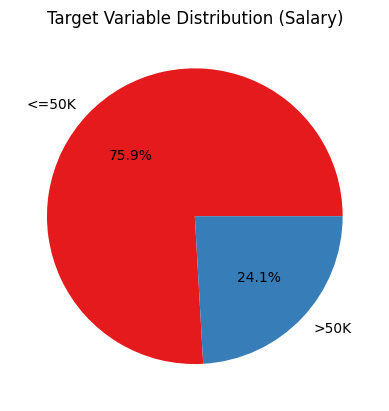

income
<=50K    24698
>50K      7839
Name: count, dtype: int64


In [ ]:
# Visualize imbalance
income_counts = df["income"].value_counts()
plt.pie(income_counts, labels=income_counts.index, autopct='%1.1f%%', colors=sns.color_palette("Set1"))
plt.title("Target Variable Distribution (Salary)")
plt.show()

print(income_counts)

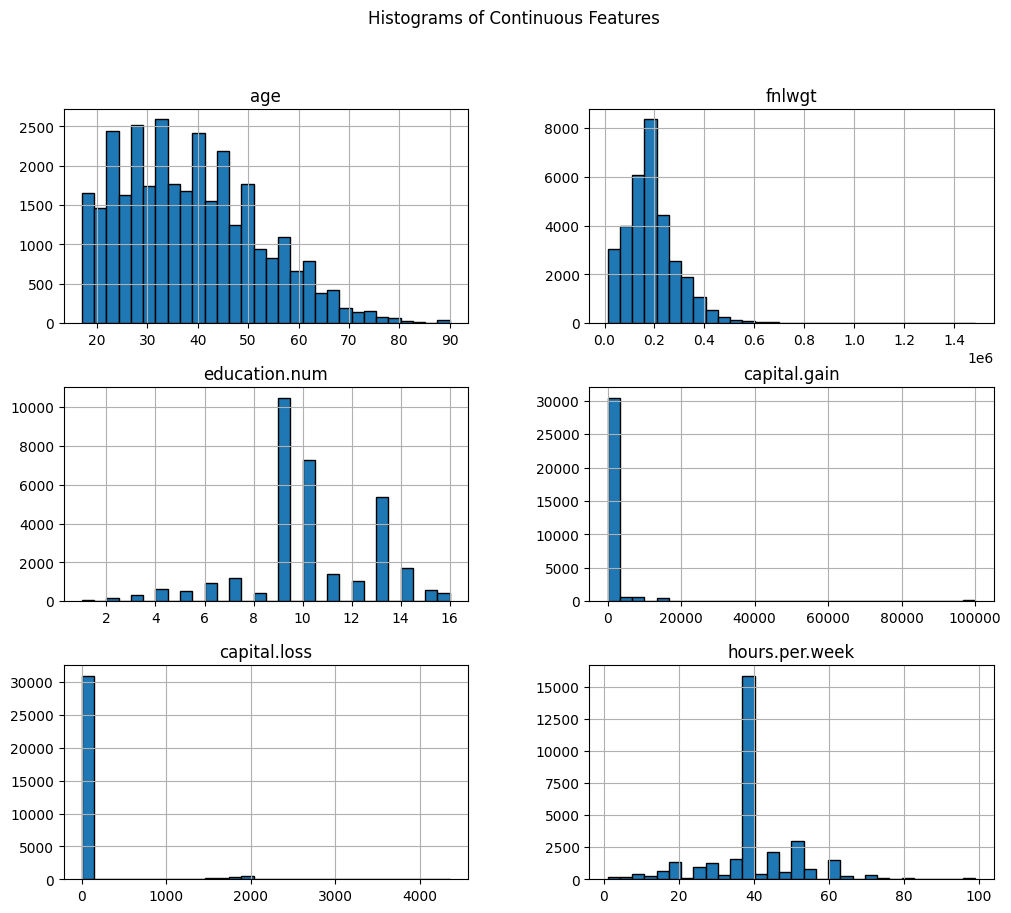

In [ ]:
df[numeric_features].hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.suptitle("Histograms of Continuous Features")
plt.show()

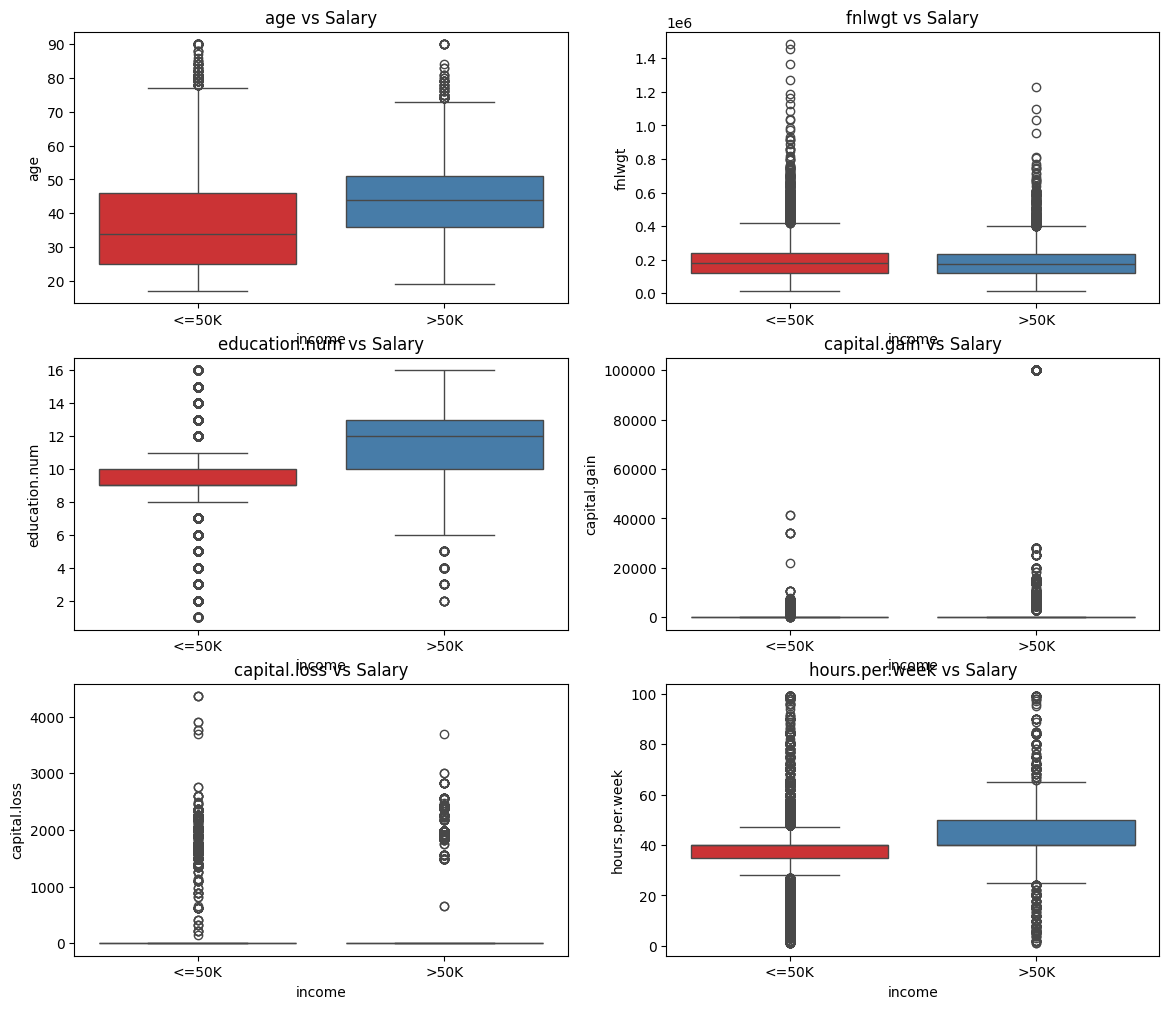

In [ ]:
ncols = 2
nrows = (len(numeric_features) + 1) // ncols

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 4*nrows))
axes = axes.flatten()

for i, col in enumerate(numeric_features):
    sns.boxplot(x="income", y=col, data=df, ax=axes[i], palette="Set1")
    axes[i].set_title(f"{col} vs Salary")

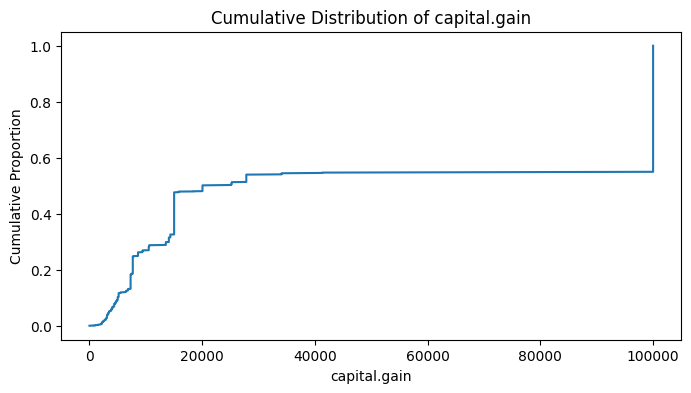

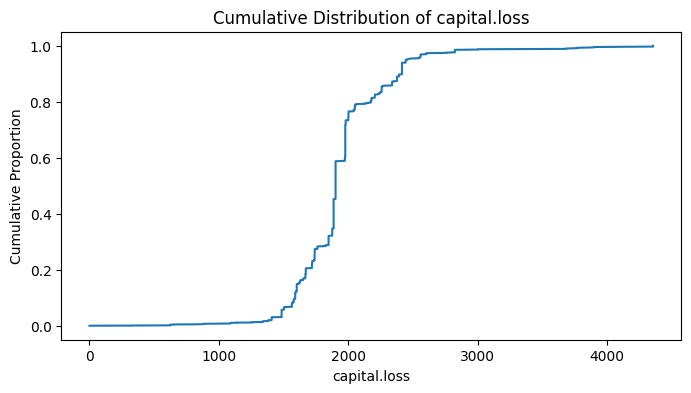

In [ ]:
skewed_cols = ["capital.gain","capital.loss"]
for col in skewed_cols:
    vals = np.sort(df[col])
    cum = np.cumsum(vals) / np.sum(vals) if np.sum(vals)>0 else np.zeros_like(vals)
    plt.figure(figsize=(8,4))
    plt.plot(vals, cum)
    plt.title(f"Cumulative Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Cumulative Proportion")
    plt.show()

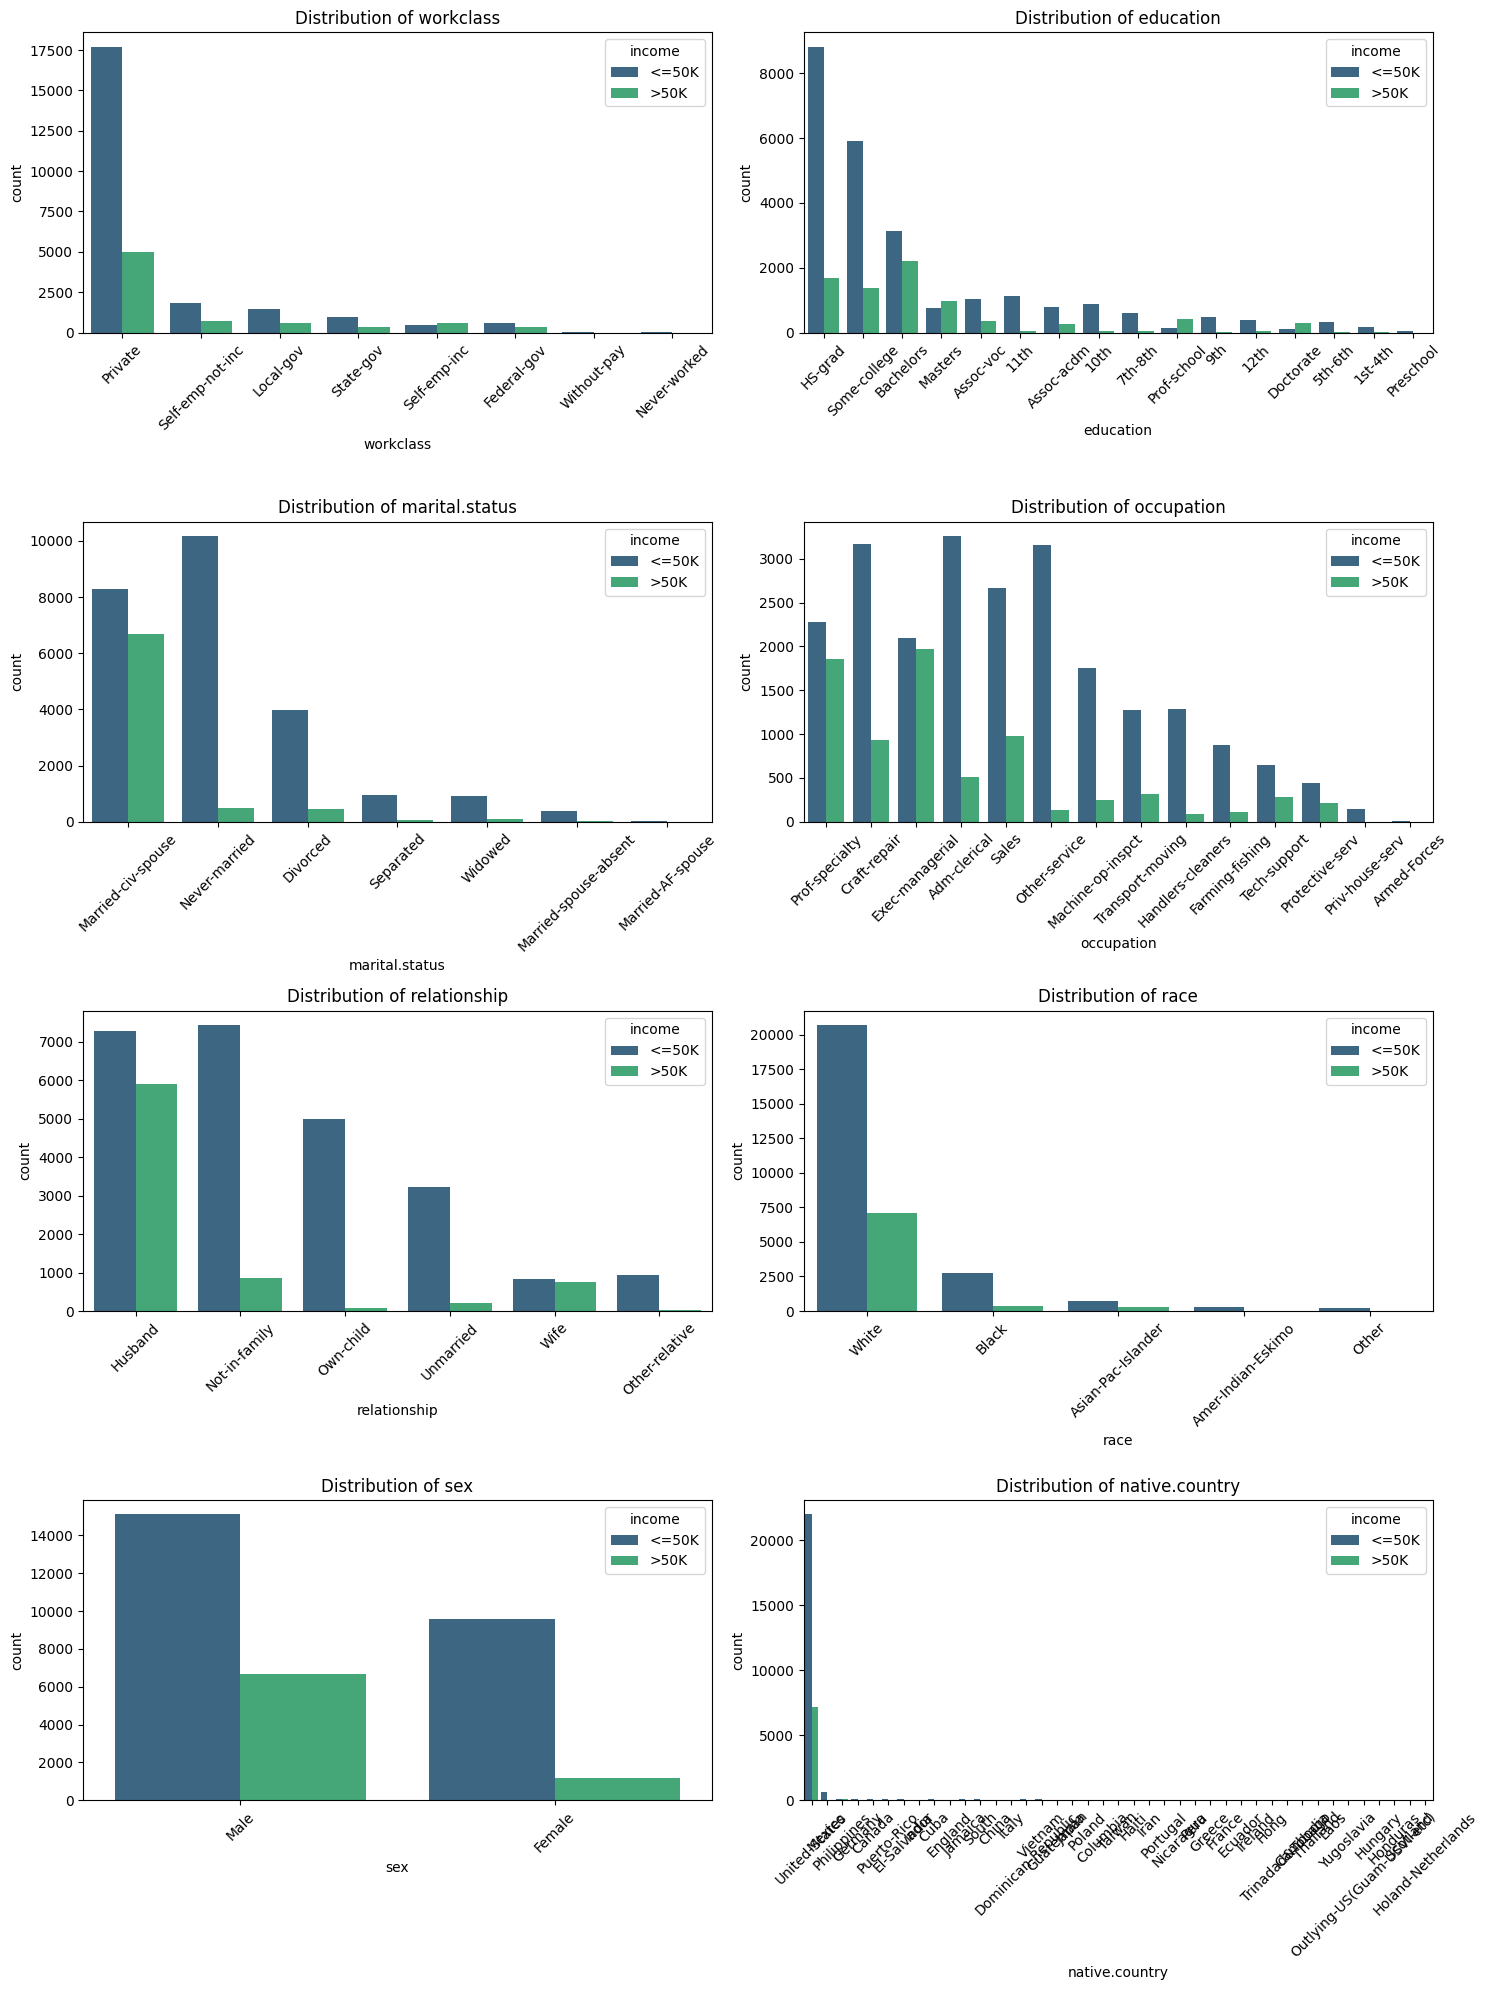

In [ ]:
fig, axes = plt.subplots(nrows=len(cat_features)//2, ncols=2, figsize=(15, 20))
axes = axes.flatten()

for i, col in enumerate(cat_features):
    sns.countplot(x=col, data=df, order=df[col].value_counts().index, ax=axes[i], palette="viridis", hue="income")
    axes[i].set_title(f"Distribution of {col}")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})
print(df['income'])

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    0
32558    1
32559    0
32560    0
Name: income, Length: 32537, dtype: int64


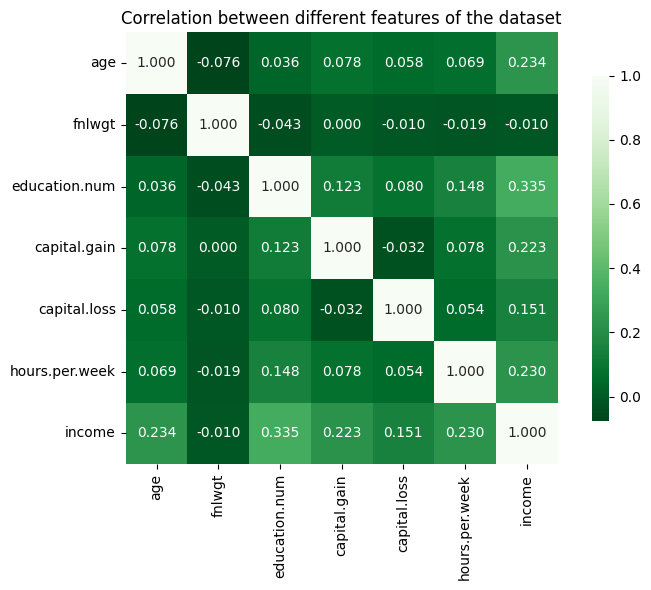

Correlation with Income:
income            1.000000
education.num     0.335272
age               0.234037
hours.per.week    0.229658
capital.gain      0.223336
capital.loss      0.150501
fnlwgt           -0.009502
Name: income, dtype: float64


In [ ]:
corr_cols = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week', 'income']

corr = df[corr_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr,
            annot=True,
            cmap='Greens_r',
            fmt='.3f',
            square=True,
            cbar_kws={'shrink': 0.8})

plt.title('Correlation between different features of the dataset')
plt.tight_layout()
plt.show()

print("Correlation with Income:")
print(corr['income'].sort_values(ascending=False))

In [ ]:
def age_group(x):
    x = int(x)
    x = abs(x)
    if( 18 < x < 31 ):
        return "19-30"
    if( 30 < x < 41 ):
        return "31-40"
    if( 40 < x < 51 ):
        return "41-50"
    if( 50 < x < 61 ):
        return "51-60"
    if( 60 < x < 71 ):
        return "61-70"
    else:
        return "Greater than 70"

df['age_group'] = df['age'].apply(age_group)

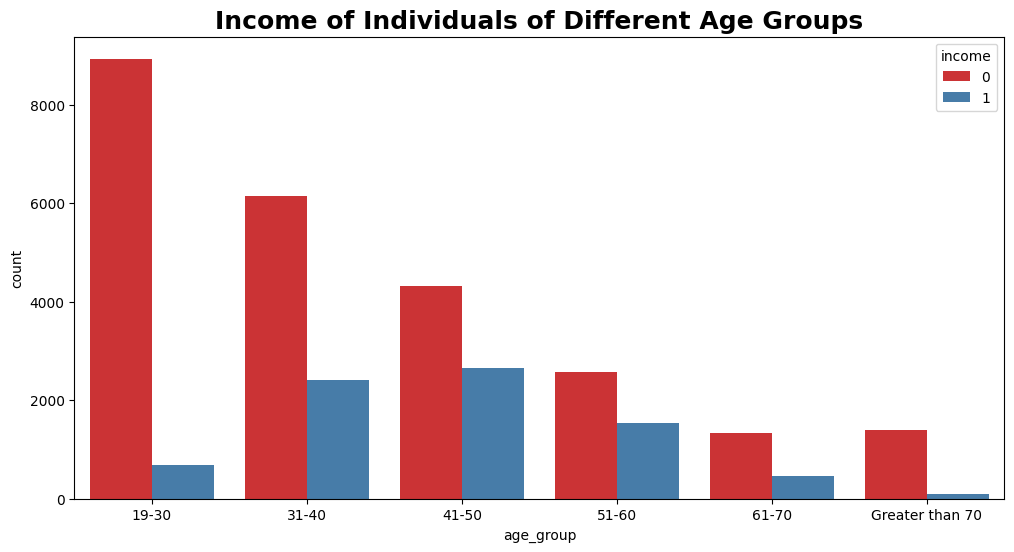

In [ ]:
plt.figure(figsize=(12,6))
order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
sns.countplot(x='age_group', hue = 'income', data=df, palette='Set1', order = order_list)
plt.title('Income of Individuals of Different Age Groups', fontsize=18, fontweight='bold')
plt.show()

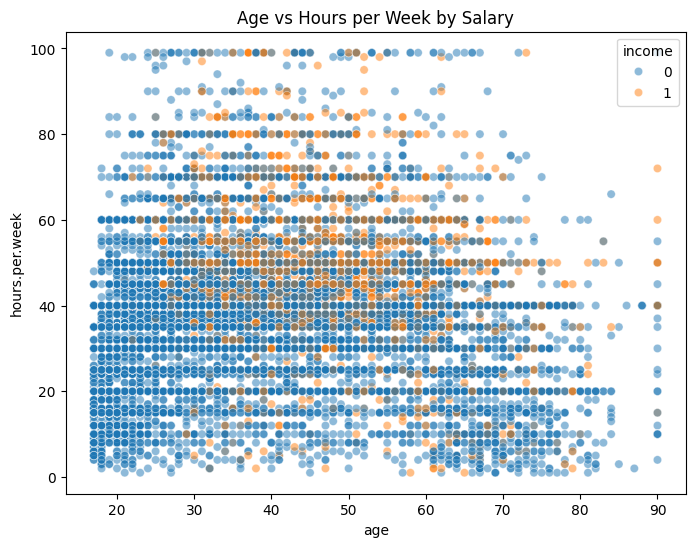

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="age", y="hours.per.week", hue="income", data=df, alpha=0.5)
plt.title("Age vs Hours per Week by Salary")
plt.show()

# Feature Engineering

In [ ]:
df = df.drop(columns=["fnlwgt"])
df.head(2)

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,age_group
0,90,NaN,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,0,Greater than 70
1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0,Greater than 70


In [ ]:
for col in skewed_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce").fillna(0)
    df[col + ".has"] = (df[col] > 0).astype(int)
    df[col + ".log1p"] = np.log1p(df[col])

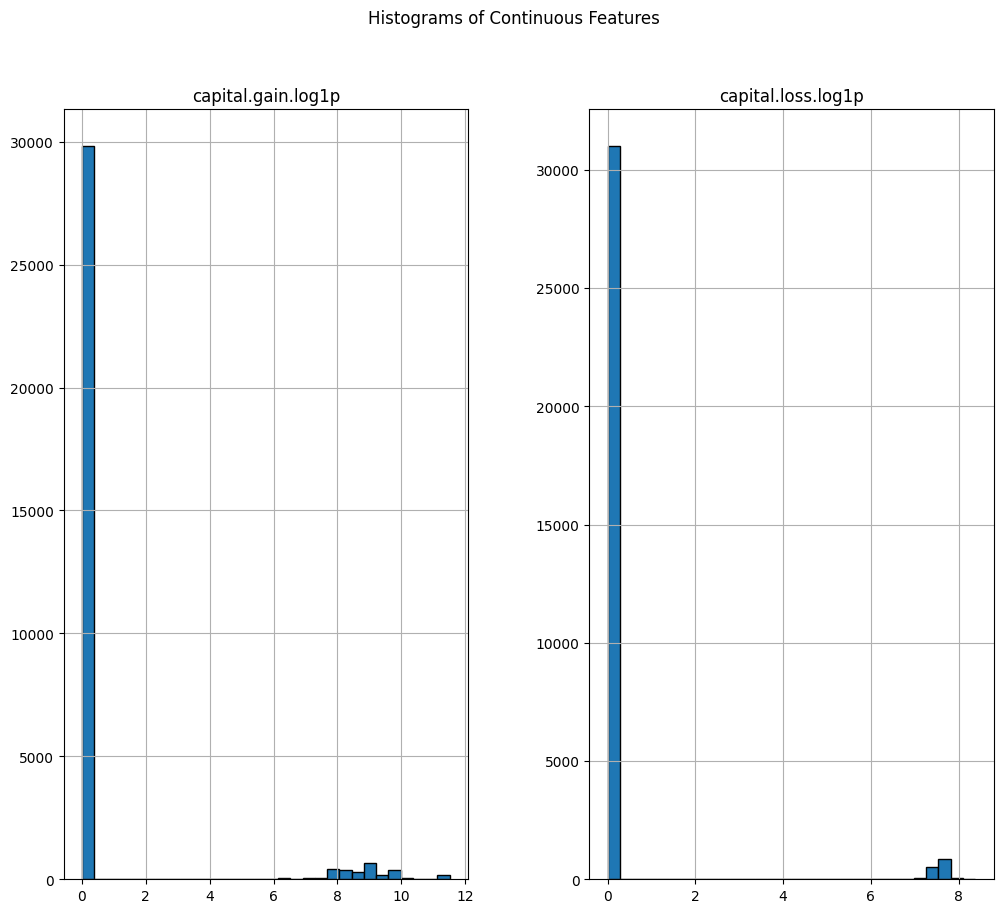

In [ ]:
log_columns = ['capital.gain.log1p', 'capital.loss.log1p']
df[log_columns].hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.suptitle("Histograms of Continuous Features")
plt.show()

In [ ]:
def iqr_clip(series, factor=1.5):
    Q1, Q3 = series.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - factor * IQR, Q3 + factor * IQR
    return series.clip(lower=lower, upper=upper)

for col in ["age", "hours.per.week"]:
    df[col + ".cliped"] = iqr_clip(df[col])

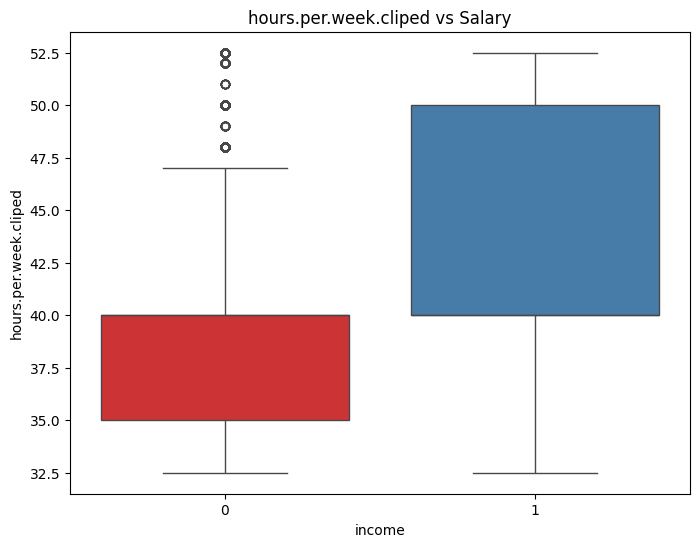

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="income", y="hours.per.week.cliped", data=df, palette="Set1")
plt.title("hours.per.week.cliped vs Salary")
plt.show()

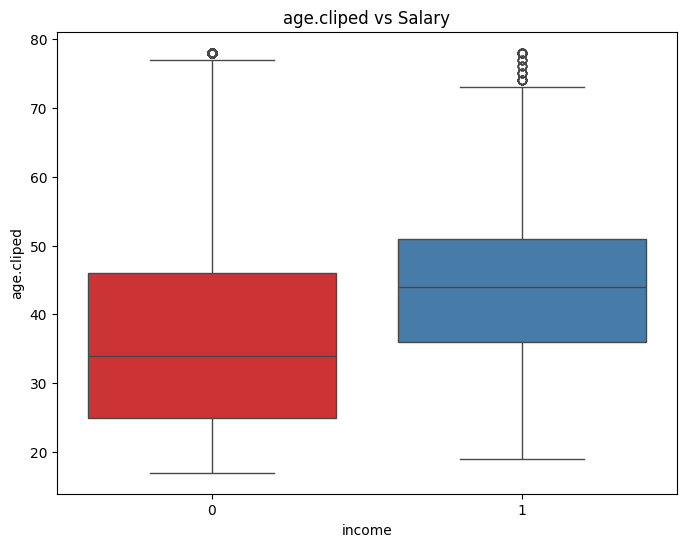

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="income", y="age.cliped", data=df, palette="Set1")
plt.title("age.cliped vs Salary")
plt.show()

In [ ]:
for col in ['workclass', 'occupation', 'native.country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

df.isnull().sum()

,0
age,0
workclass,0
education,0
education.num,0
marital.status,0
occupation,0
relationship,0
race,0
sex,0
capital.gain,0


In [ ]:
def group_rare(df, col, min_count=500):
    counts = df[col].value_counts()
    rare = counts[counts < min_count].index
    df[col] = df[col].replace(rare, "Other")
    return df

df = group_rare(df, "native.country", min_count=200)
df = group_rare(df, "occupation", min_count=900)
df = group_rare(df, "workclass", min_count=1200)
df = group_rare(df, "marital.status", min_count=500)

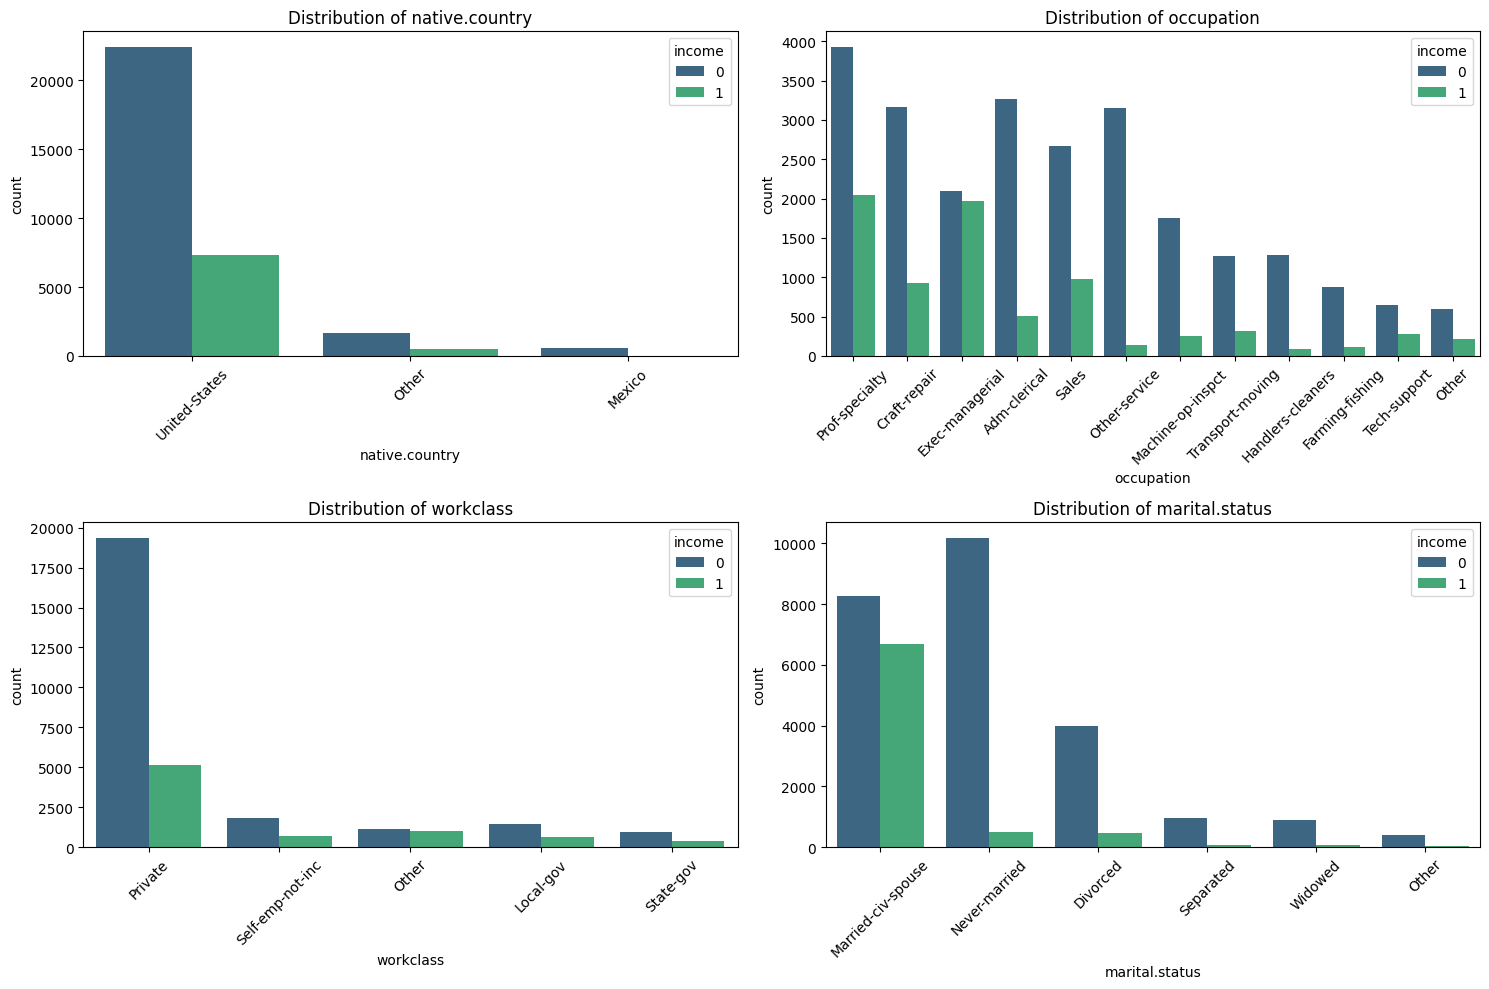

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(["native.country", "occupation", "workclass", "marital.status"]):
    sns.countplot(x=col, data=df, order=df[col].value_counts().index, ax=axes[i], palette="viridis", hue="income")
    axes[i].set_title(f"Distribution of {col}")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
df = df.drop(columns=["capital.gain", "capital.loss", "age_group", "education", "hours.per.week", "age"])
df

,workclass,education.num,marital.status,occupation,relationship,race,sex,native.country,income,capital.gain.has,capital.gain.log1p,capital.loss.has,capital.loss.log1p,age.cliped,hours.per.week.cliped
0,Private,9,Widowed,Prof-specialty,Not-in-family,White,Female,United-States,0,0,0.0,1,8.379539,78,40.0
1,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,0,0,0.0,1,8.379539,78,32.5
2,Private,10,Widowed,Prof-specialty,Unmarried,Black,Female,United-States,0,0,0.0,1,8.379539,66,40.0
3,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,0,0,0.0,1,8.268988,54,40.0
4,Private,10,Separated,Prof-specialty,Own-child,White,Female,United-States,0,0,0.0,1,8.268988,41,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,Private,10,Never-married,Other,Not-in-family,White,Male,United-States,0,0,0.0,0,0.000000,22,40.0
32557,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,0,0,0.0,0,0.000000,27,38.0
32558,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,1,0,0.0,0,0.000000,40,40.0
32559,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,United-States,0,0,0.0,0,0.000000,58,40.0


In [ ]:
numeric_features = ["age.cliped", "capital.gain.log1p", "capital.loss.log1p",
                    "education.num","hours.per.week.cliped"]

scaler = RobustScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [ ]:
cat_features = ["sex", "race", "relationship", "marital.status", "native.country", "workclass", "occupation"]

df = pd.get_dummies(df, columns=cat_features, drop_first=True)

In [ ]:
df

,education.num,income,capital.gain.has,capital.gain.log1p,capital.loss.has,capital.loss.log1p,age.cliped,hours.per.week.cliped,sex_Male,race_Asian-Pac-Islander,...,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other,occupation_Other-service,occupation_Prof-specialty,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,-0.333333,0,0,0.0,1,8.379539,2.05,0.0,False,False,...,False,False,False,False,False,False,True,False,False,False
1,-0.333333,0,0,0.0,1,8.379539,2.05,-1.5,False,False,...,True,False,False,False,False,False,False,False,False,False
2,0.000000,0,0,0.0,1,8.379539,1.45,0.0,False,False,...,False,False,False,False,False,False,True,False,False,False
3,-2.000000,0,0,0.0,1,8.268988,0.85,0.0,False,False,...,False,False,False,True,False,False,False,False,False,False
4,0.000000,0,0,0.0,1,8.268988,0.20,0.0,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.000000,0,0,0.0,0,0.000000,-0.75,0.0,True,False,...,False,False,False,False,True,False,False,False,False,False
32557,0.666667,0,0,0.0,0,0.000000,-0.50,-0.4,False,False,...,False,False,False,False,False,False,False,False,True,False
32558,-0.333333,1,0,0.0,0,0.000000,0.15,0.0,True,False,...,False,False,False,True,False,False,False,False,False,False
32559,-0.333333,0,0,0.0,0,0.000000,1.05,0.0,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
X = df.drop("income", axis=1)
y = df["income"]

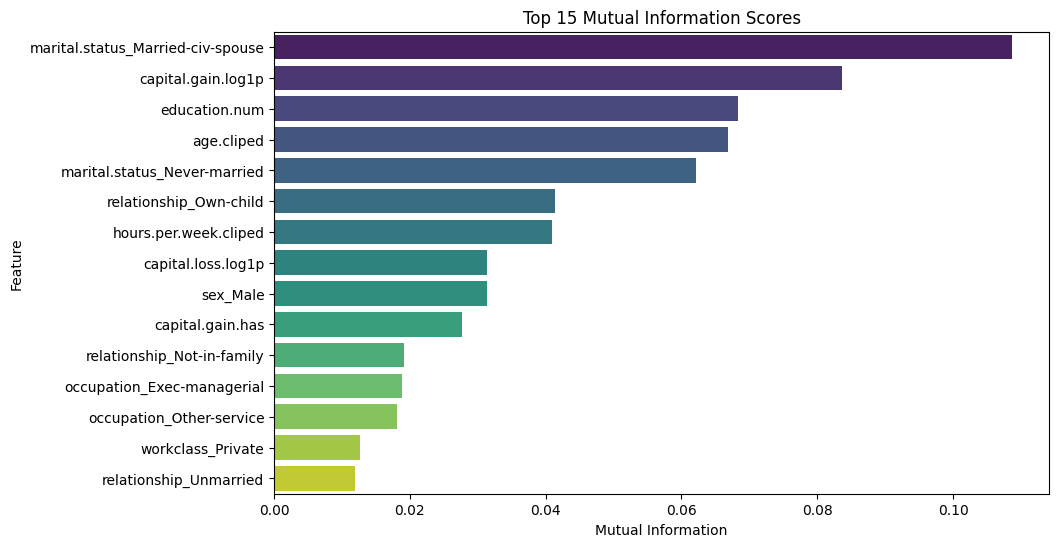

In [ ]:
mi_scores = mutual_info_classif(X, y, discrete_features="auto", random_state=42)
mi_df = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=mi_df.values[:15], y=mi_df.index[:15], palette="viridis")
plt.title("Top 15 Mutual Information Scores")
plt.xlabel("Mutual Information")
plt.ylabel("Feature")
plt.show()

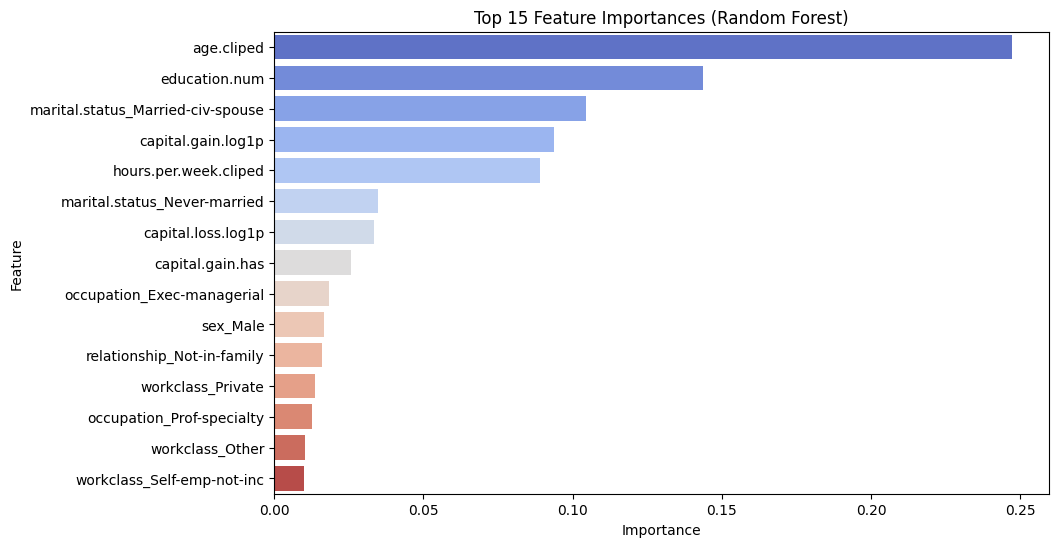

In [ ]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X, y)

importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=importances.values[:15], y=importances.index[:15], palette="coolwarm")
plt.title("Top 15 Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())

Before SMOTE: income
0    19758
1     6271
Name: count, dtype: int64
After SMOTE: income
0    19758
1    19758
Name: count, dtype: int64


# Models

## Logistic Regression

In [ ]:
log = LogisticRegression(max_iter=1000, class_weight="balanced")
log.fit(X_train, y_train)

y_train_pred = log.predict(X_train)
accuracy_score(y_train, y_train_pred)

0.8083291713089247

In [ ]:
y_log_pred = log.predict(X_test)
accuracy_score(y_test, y_log_pred)

0.8045482483097726

In [ ]:
print(classification_report(y_test, y_log_pred))

              precision    recall  f1-score   support

           0       0.94      0.80      0.86      4940
           1       0.56      0.83      0.67      1568

    accuracy                           0.80      6508
   macro avg       0.75      0.81      0.77      6508
weighted avg       0.85      0.80      0.82      6508



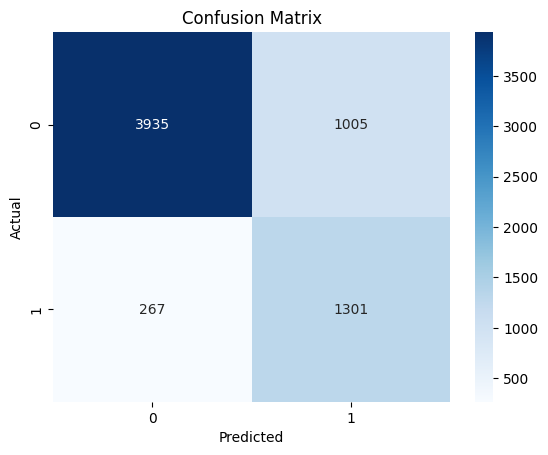

In [ ]:
cm = confusion_matrix(y_test, y_log_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

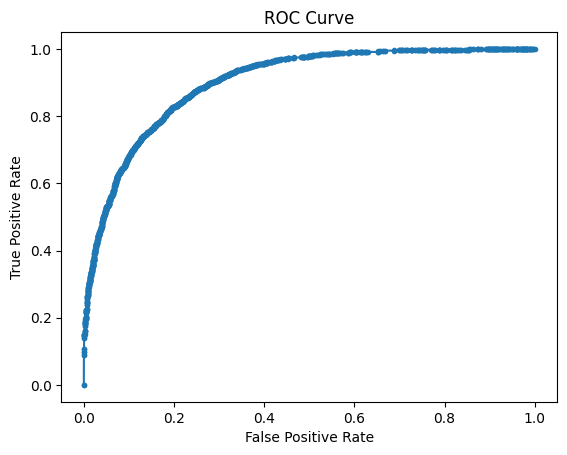

AUC Score: 0.90


In [ ]:
y_prob = log.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

auc_score = roc_auc_score(y_test, y_prob)
print(f"AUC Score: {auc_score:.2f}")

## KNN

In [ ]:
param_grid = {'n_neighbors': range(3, 14)}
knn = KNeighborsClassifier(weights='distance')
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(weights='distance'),
             param_grid={'n_neighbors': range(3, 14)})

In [ ]:
best_k = grid_search.best_params_['n_neighbors']
print(f"Best value for k: {best_k}")

Best value for k: 13


In [ ]:
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred = knn_best.predict(X_test)

y_train_pred = knn_best.predict(X_train)
accuracy_score(y_train, y_train_pred)

0.868415997541204

In [ ]:
y_pred = knn_best.predict(X_test)
accuracy_score(y_test, y_pred)

0.8400430239704979

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90      4940
           1       0.68      0.62      0.65      1568

    accuracy                           0.84      6508
   macro avg       0.78      0.77      0.77      6508
weighted avg       0.84      0.84      0.84      6508



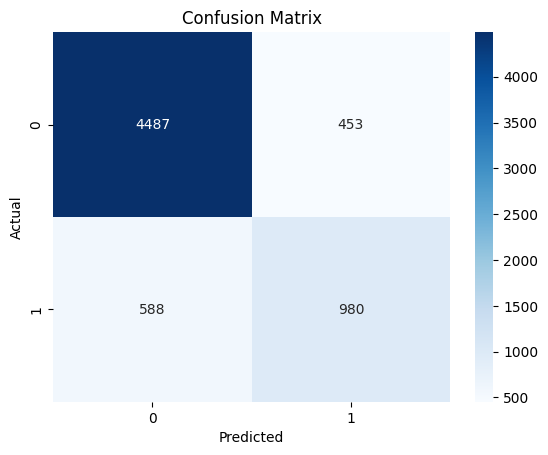

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

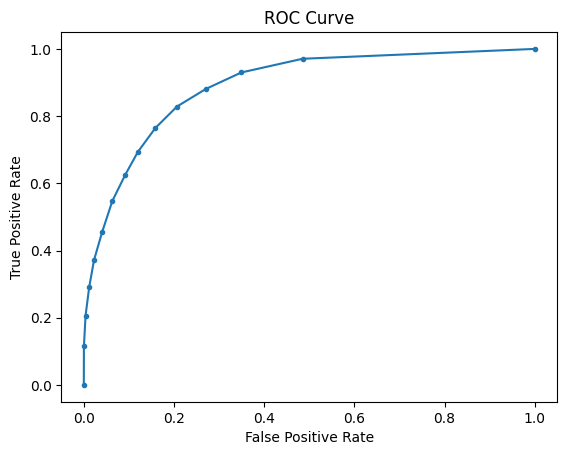

AUC Score: 0.89


In [ ]:
y_prob = knn_best.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

auc_score = roc_auc_score(y_test, y_prob)
print(f"AUC Score: {auc_score:.2f}")

## SVM

In [ ]:
svc = SVC(kernel= 'rbf', class_weight="balanced", probability=True, C=0.5)
svc.fit(X_train, y_train)

y_train_pred = svc.predict(X_train)
accuracy_score(y_train, y_train_pred)

0.8088286142379654

In [ ]:
y_pred = svc.predict(X_test)
accuracy_score(y_test, y_pred)

0.8007068223724647

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.79      0.86      4940
           1       0.56      0.85      0.67      1568

    accuracy                           0.80      6508
   macro avg       0.75      0.82      0.76      6508
weighted avg       0.85      0.80      0.81      6508



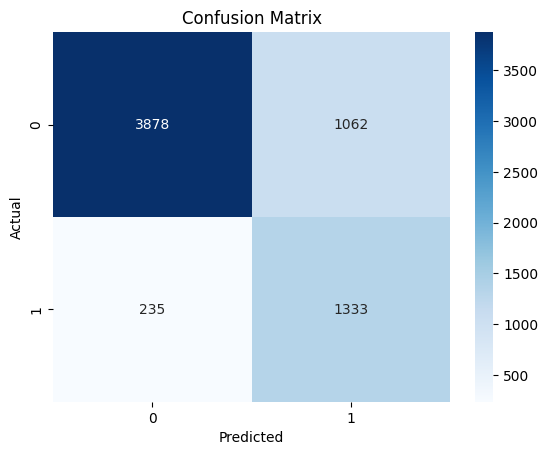

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

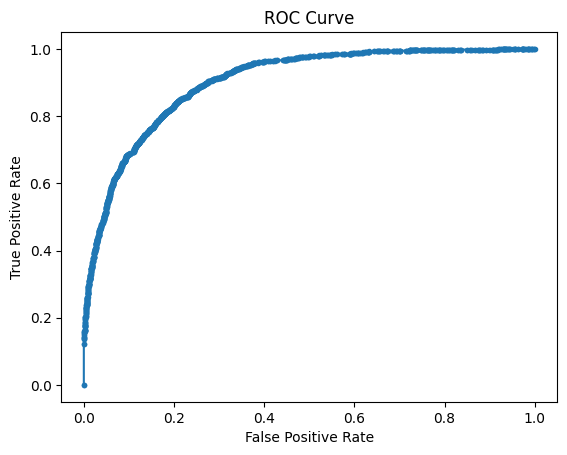

AUC Score: 0.90


In [ ]:
y_prob = svc.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

auc_score = roc_auc_score(y_test, y_prob)
print(f"AUC Score: {auc_score:.2f}")

## Naive Bayes

In [ ]:
Bernoulli_nb = BernoulliNB()
Bernoulli_nb.fit(X_train, y_train)

y_train_pred = Bernoulli_nb.predict(X_train)
accuracy_score(y_train, y_train_pred)

0.8061777248453648

In [ ]:
y_pred = Bernoulli_nb.predict(X_test)
accuracy_score(y_test, y_pred)

0.7999385371850031

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86      4940
           1       0.56      0.75      0.64      1568

    accuracy                           0.80      6508
   macro avg       0.74      0.78      0.75      6508
weighted avg       0.83      0.80      0.81      6508



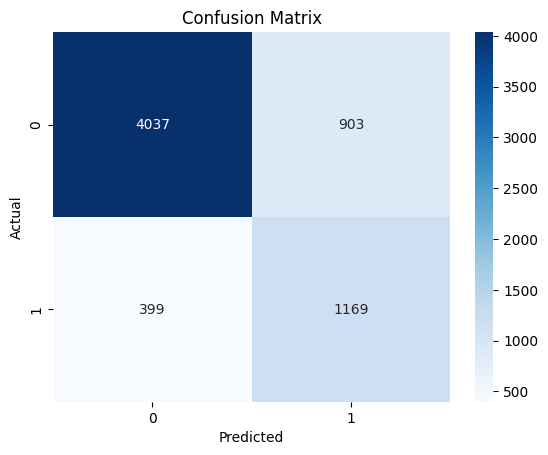

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

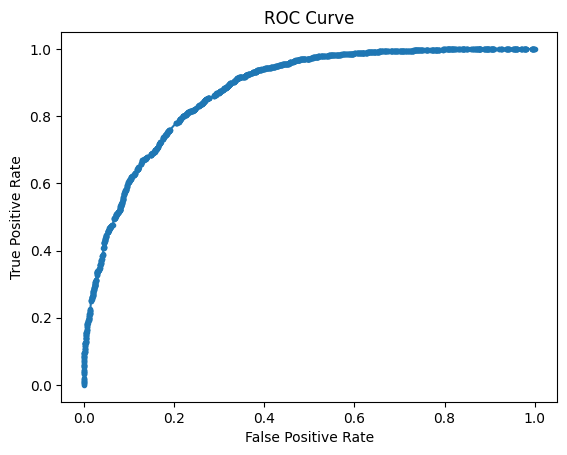

AUC Score: 0.88


In [ ]:
y_prob = Bernoulli_nb.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

auc_score = roc_auc_score(y_test, y_prob)
print(f"AUC Score: {auc_score:.2f}")

## Decision Tree

In [ ]:
dt = DecisionTreeClassifier(random_state=42, class_weight='balanced', max_depth=10)
dt.fit(X_train, y_train)

y_train_pred = dt.predict(X_train)
accuracy_score(y_train, y_train_pred)

0.8256175803911022

In [ ]:
y_pred = dt.predict(X_test)
accuracy_score(y_test, y_pred)

0.801321450522434

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.79      0.86      4940
           1       0.56      0.85      0.67      1568

    accuracy                           0.80      6508
   macro avg       0.75      0.82      0.76      6508
weighted avg       0.85      0.80      0.81      6508



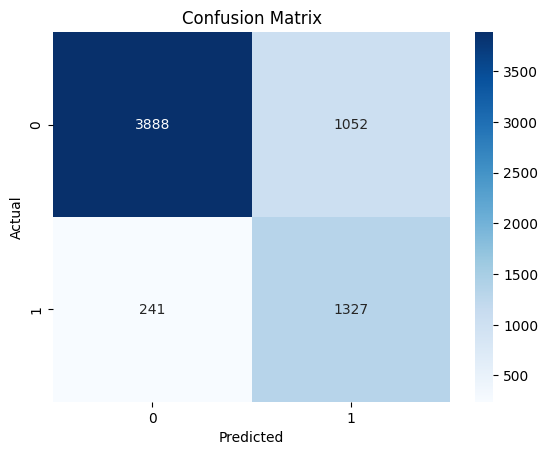

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

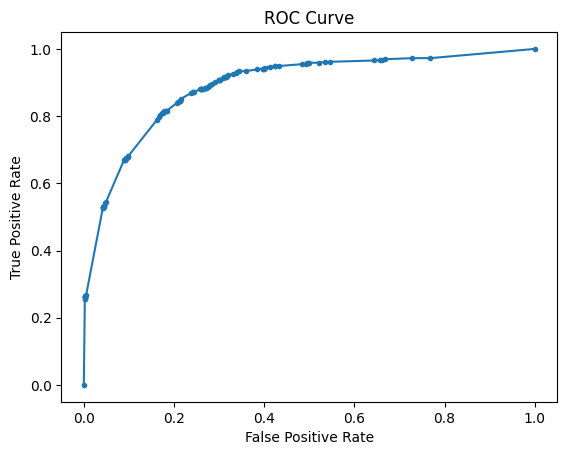

AUC Score: 0.89


In [ ]:
y_prob = dt.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

auc_score = roc_auc_score(y_test, y_prob)
print(f"AUC Score: {auc_score:.2f}")

## Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, max_depth=13, class_weight='balanced')
rf.fit(X_train, y_train)

y_train_pred = rf.predict(X_train)
accuracy_score(y_train, y_train_pred)

0.8431365015943755

In [ ]:
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8146896127842655

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.81      0.87      4940
           1       0.58      0.83      0.68      1568

    accuracy                           0.81      6508
   macro avg       0.76      0.82      0.78      6508
weighted avg       0.85      0.81      0.82      6508



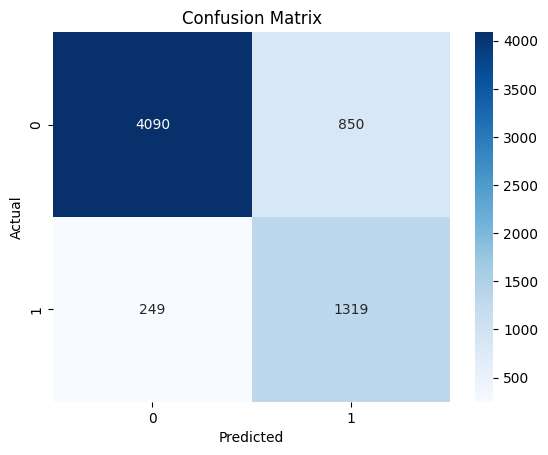

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

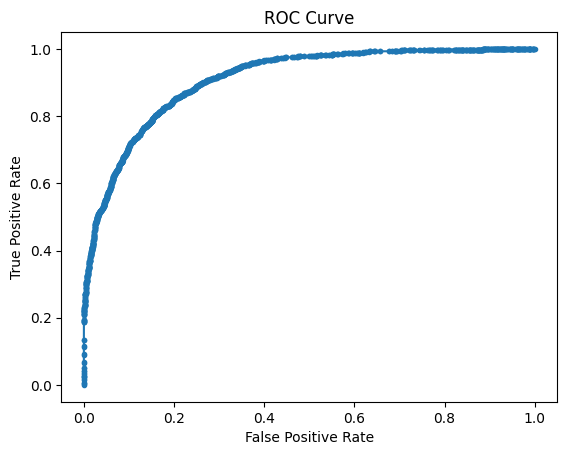

AUC Score: 0.91


In [ ]:
y_prob = rf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

auc_score = roc_auc_score(y_test, y_prob)
print(f"AUC Score: {auc_score:.2f}")

## XGBoost

In [ ]:
n_neg = np.sum(y_train == 0)
n_pos = np.sum(y_train == 1)

print(f"Negatives: {n_neg}, Positives: {n_pos}")

Negatives: 19758, Positives: 6271


In [ ]:
xg =  XGBClassifier(eval_metric='aucpr', n_estimators=50, random_state=42, scale_pos_weight=(n_neg/n_pos))
xg.fit(X_train, y_train)

y_train_pred = xg.predict(X_train)
accuracy_score(y_train, y_train_pred)

0.8530101041146414

In [ ]:
y_pred = xg.predict(X_test)
accuracy_score(y_test, y_pred)

0.8363552550706822

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.84      0.89      4940
           1       0.62      0.84      0.71      1568

    accuracy                           0.84      6508
   macro avg       0.78      0.84      0.80      6508
weighted avg       0.86      0.84      0.84      6508



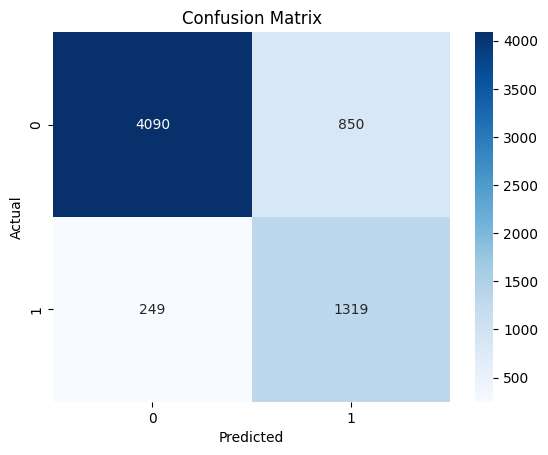

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

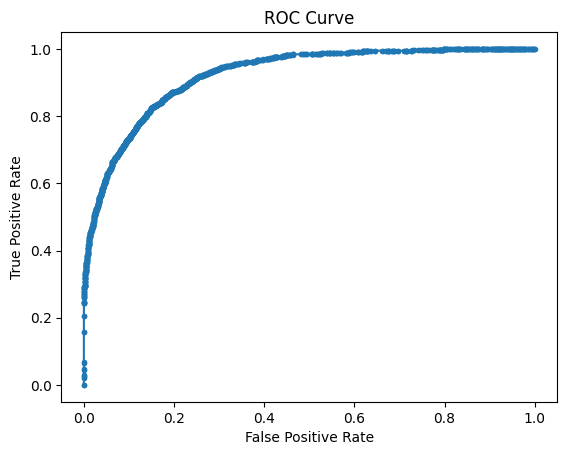

AUC Score: 0.92


In [ ]:
y_prob = xg.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

auc_score = roc_auc_score(y_test, y_prob)
print(f"AUC Score: {auc_score:.2f}")

# Results

| Model                   | Train Accuracy | Test Accuracy | Precision (Class 1) | Recall (Class 1) | F1-Score (Class 1) | AUC  |
| ----------------------- | -------------- | ------------- | ------------------- | ---------------- | ------------------ | ---- |
| Logistic Regression     | 0.80           | 0.80          | 0.56                | 0.83             | 0.67               | 0.90 |
| KNN (k=13) Unbalanced              | 0.86           | 0.84          | 0.68                | 0.62             | 0.65               | 0.89 |
| SVM (RBF, C=0.5)          | 0.80           | 0.80          | 0.56                | 0.85             | 0.67               | 0.90 |
| Naive Bayes (Bernoulli) | 0.80           | 0.80          | 0.56                | 0.75             | 0.64               | 0.88 |
| Decision Tree           | 0.82           | 0.80          | 0.56                | 0.85             | 0.67               | 0.89 |
| Random Forest           | 0.84           | 0.82          | 0.58                | 0.83             | 0.68               | 0.91 |
| XGBoost      | 0.85           | 0.84          | 0.62                | 0.84             | 0.71               | 0.92 |
